In [173]:
import numpy as np
import matplotlib.pyplot as plt

In [174]:
a, b = np.pi/2, np.pi/2 + 0.8
y_0 = 0
def f(t: np.float64, y: np.float64) -> np.float64:
    return -y/t + np.cos(t)/t
def exact_solution(t: np.float64) -> np.float64:
    return (np.sin(t) - 1)/t

In [175]:
def Euler_method(f, h, a=a, b=b) -> np.ndarray:
    n_steps = int(np.ceil((b - a)/h))
    h = (b - a)/n_steps
    res = np.zeros(n_steps+1)
    res[0] = y_0
    t = lambda i: a + i*h
    for i in range(1, n_steps+1):
        res[i] = res[i-1] + h*f(t(i-1), res[i-1])
    return res

def ExtrapolyAdams3(f, h, a=a, b=b) -> np.ndarray:
    n_steps = int(np.ceil((b - a)/h))
    h = (b - a)/n_steps
    res = np.zeros(n_steps+1)
    t = lambda i: a + i*h
    res[0] = y_0
    res[1] = exact_solution(t(1))
    res[2] = exact_solution(t(2))
    for i in range(3, n_steps+1):
        res[i] = (res[i-1] + h/12 * 
                  (23*f(t(i-1), res[i-1]) - 
                   16*f(t(i-2), res[i-2]) + 
                   5*f(t(i-3), res[i-3])))
    return res

def SolveByPrecision(f, eps, method, p, a=a, b=b) -> np.ndarray:
    h = 0.1
    y_2h, y_h = method(f, 2*h), method(f, h)
    while max([np.abs(y_h[2*i] - y_2h[i]) for i in range(y_2h.size)])/(np.power(2, p) - 1) > eps:
        h /= 2
        y_2h, y_h = y_h, method(f, h)
    return y_h, h #exact values, step length

In [179]:
eps = 1e-6
y_1, h1 = SolveByPrecision(f, eps, Euler_method, 1)
y_2, h2 = SolveByPrecision(f, eps, ExtrapolyAdams3, 3)
n_steps1 = y_1.size
n_steps2 = y_2.size
print(n_steps1, n_steps2)
print(h1, h2)

131073 65
6.103515625e-06 0.0125


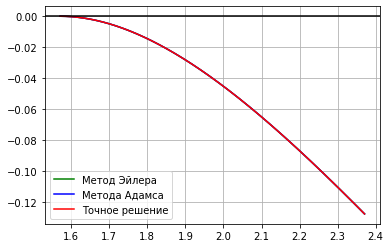

In [182]:
x_data1 = np.array([a + i*h1 for i in range(n_steps1)])
x_data2 = np.array([a + i*h2 for i in range(n_steps2)])
fig, axs = plt.subplots()
axs.plot(x_data1, y_1, label='Метод Эйлера', color="green")
axs.plot(x_data2, y_2, label='Метода Адамса', color="blue")
axs.plot(x_data1, exact_solution(x_data1), label='Точное решение', color="red")
ax = plt.gca()
axs.legend()
axs.grid(True)
ax.axhline(y=0, color='k')
#plt.savefig("images/6.2_solution_plot.png", dpi=500)

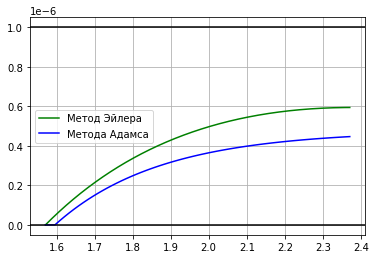

In [186]:
x_data1 = np.array([a + i*h1 for i in range(n_steps1)])
x_data2 = np.array([a + i*h2 for i in range(n_steps2)])
fig, axs = plt.subplots()
axs.plot(x_data1, np.abs(exact_solution(x_data1) - y_1), label='Метод Эйлера', color="green")
axs.plot(x_data2, np.abs(exact_solution(x_data2) - y_2), label='Метода Адамса', color="blue")
ax = plt.gca()
axs.grid(True)
axs.legend()
ax.axhline(y=0, color='k')
ax.axhline(y=eps, color='k')
#plt.savefig("images/6.2_solution_err_plot.png", dpi=500)